Indehold:

 - Assess your predicted strain designs using simulations and pathway visualizations
 - Assess manually derived strain designs using model simulations
 - Based on your computations, provide a top 10 list of most promising cell factory designs. The criteria for "most promising" are the number of modifications, yield, growth rate and others you might define

# Visualisation of changes in the central carbon metabolism using *Escher*

When implementing a heterologous pathway in the strain, the altered flux will cause changes in other pahtways as well, including the central carbon metabolism, where the energy building blocks are made. With *Escher*, the changes on the flux that our heterologous pathway is causing can be visualised.

In [8]:
# Load relevant packages
from IPython.display import FileLink, FileLinks, Image
from cobra.io import read_sbml_model 
from cobra import Model, Reaction, Metabolite
import escher

In [2]:
model = read_sbml_model('models/iMM904_progesterone_fixed.xml') # Load model

In [3]:
model.add_boundary(model.metabolites.get_by_id("progesterone_c"), type="demand") # Because it is a reversible reaction, we need to set a demand for production of progesterone 

Reaction identifier,DM_progesterone_c
Name,progesterone demand
Memory address,0x1317bfbb0
Stoichiometry,progesterone_c --> progesterone -->
GPR,
Lower bound,0
Upper bound,1000.0


In [7]:
escher.view_available_maps()

AttributeError: module 'escher' has no attribute 'view_available_maps'

In [4]:
escher.Builder('iMM904.Central carbon metabolism') # Use escher to visualise the iMM904 model (central metabolism - only one available on escher)

Builder()

In [ ]:
Image('figures/iMM904.png') # see image of pathway

In [5]:
solution = model.optimize() # simulate model
fluxes=solution.fluxes[solution.fluxes != 0.] # filter to only non-zero values


In [6]:
escher.Builder('iMM904.Central carbon metabolism',
               reaction_data=fluxes.to_dict()) # Adding our fluxes to the iMM904 model and watch how they change

Builder(reaction_data={'13GS': 0.32667000056331613, 'ACCOAC': 0.11445540379271635, 'AGAT_SC': 0.00711028288148…

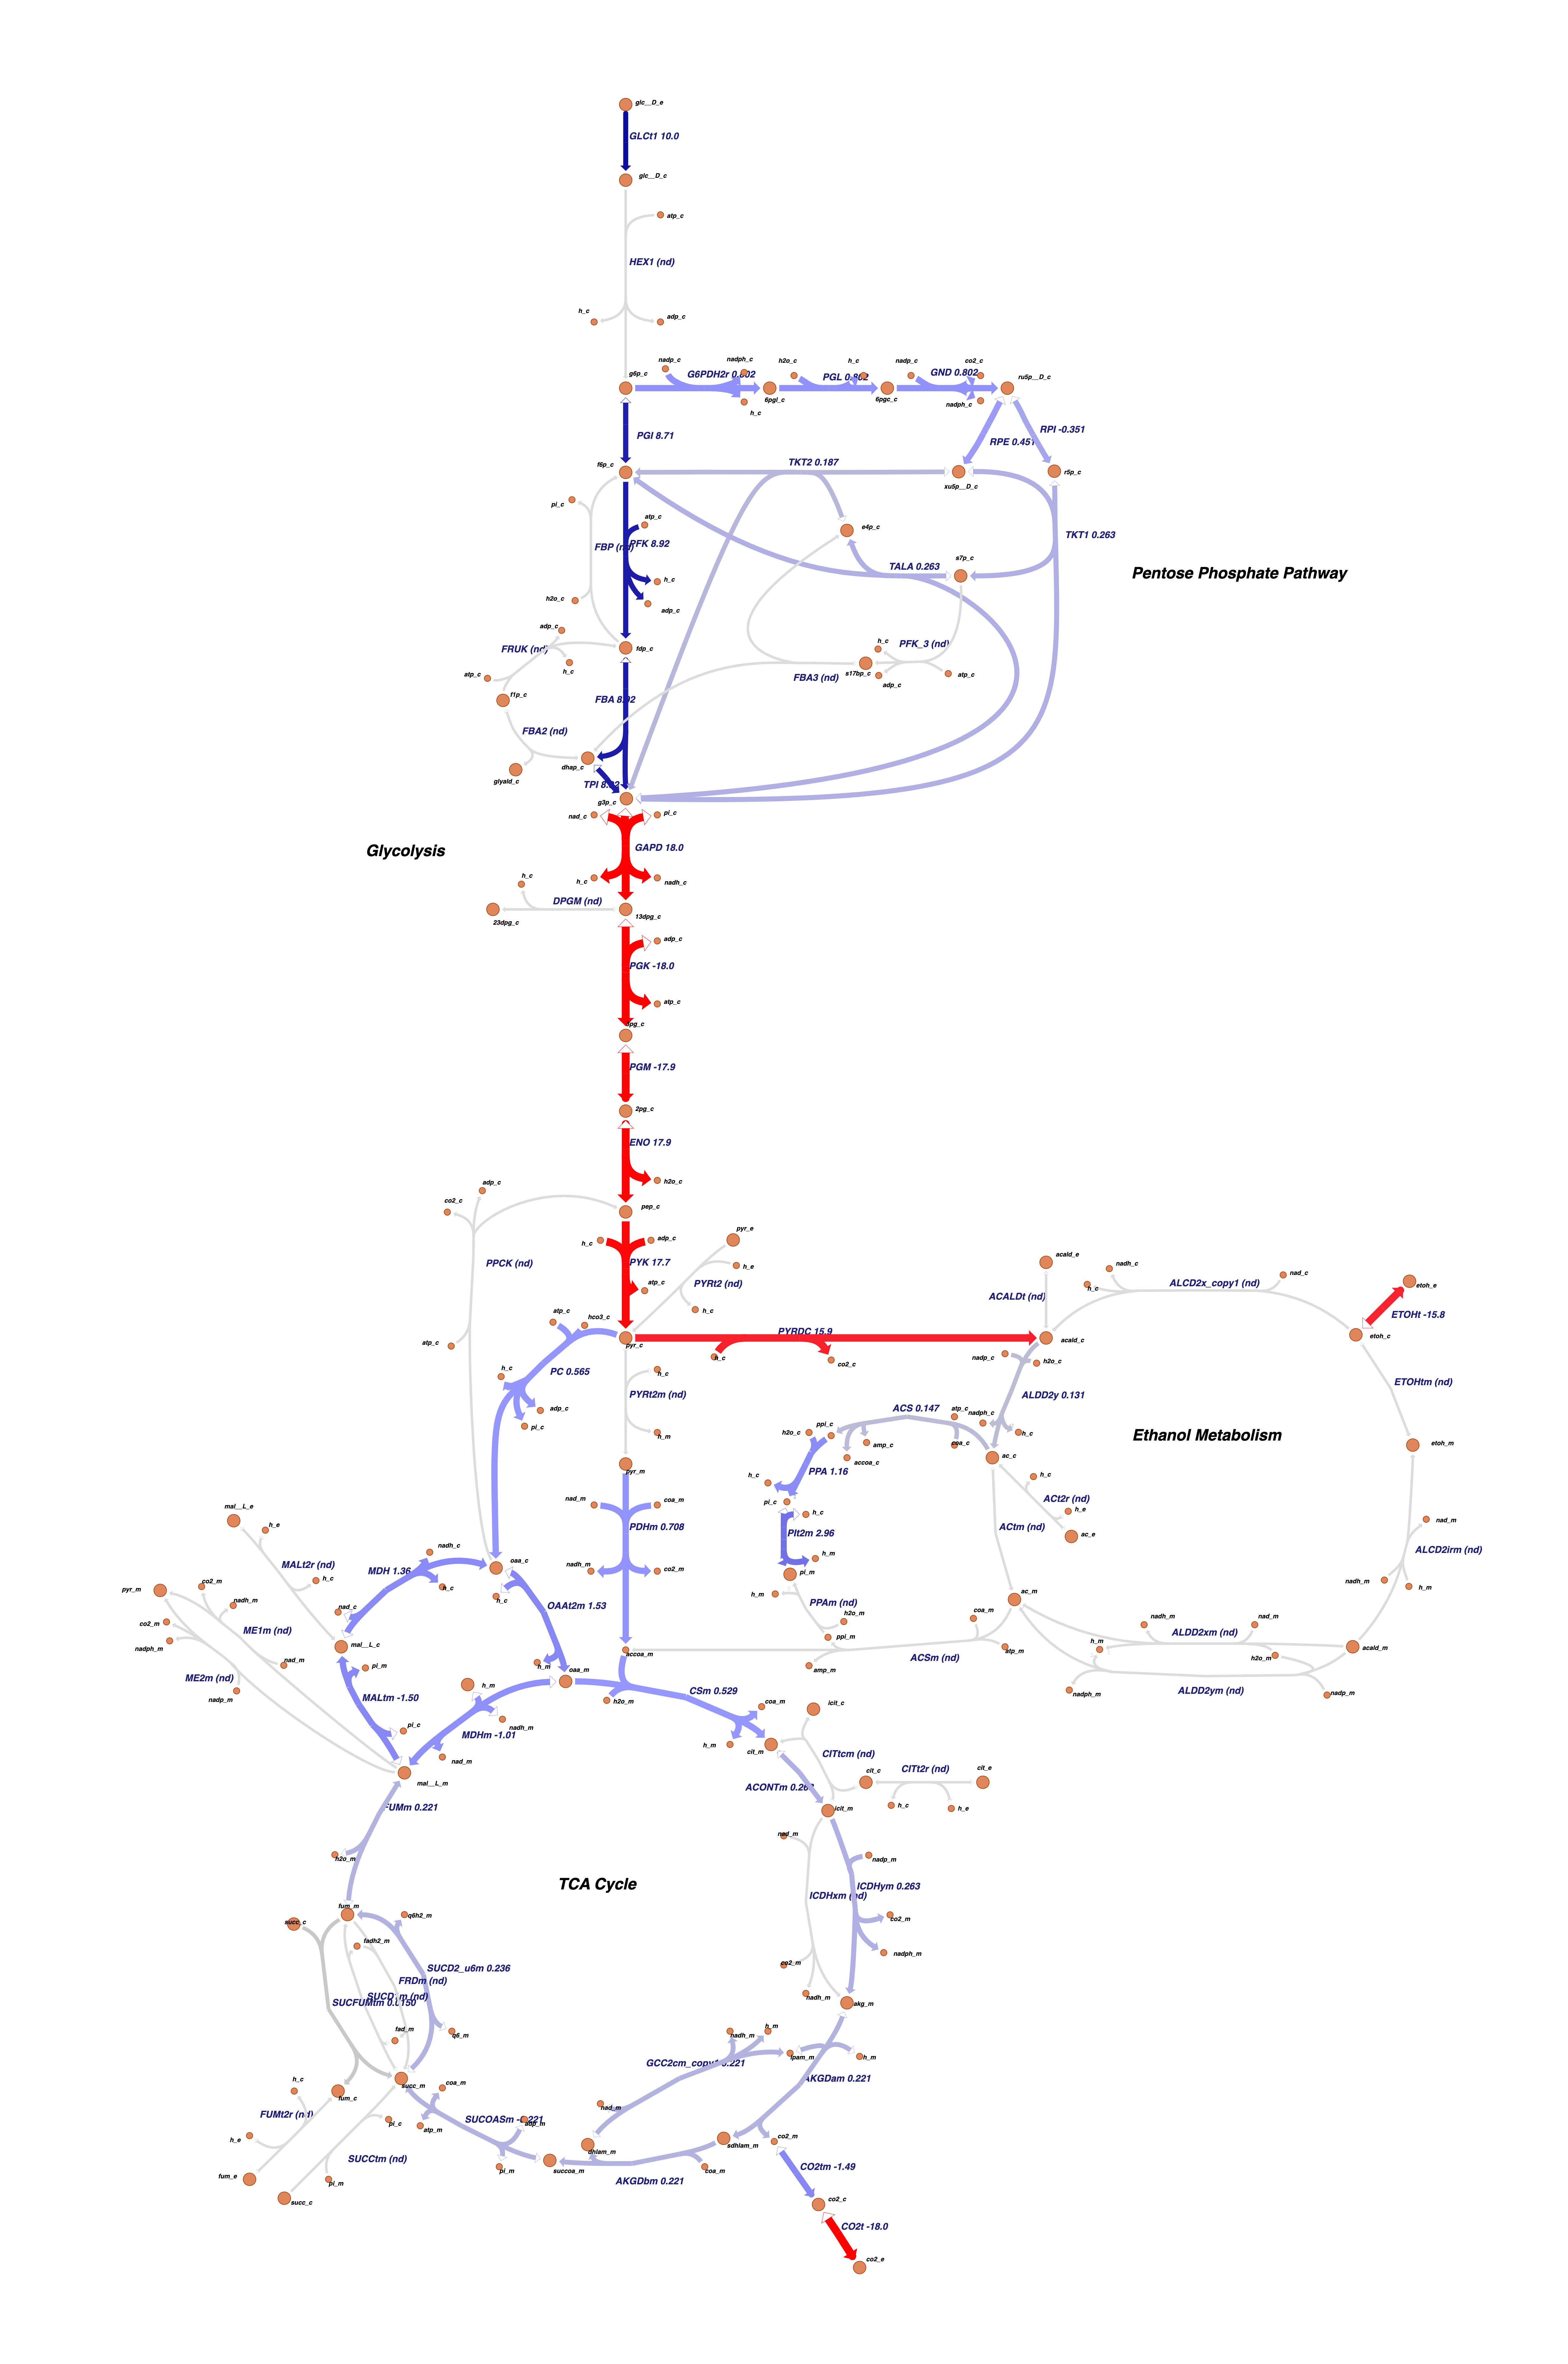

In [10]:
Image('figures/New_model.png') # see image of pathway fluxes

It can be seen that changing the model affects the central metabolism in several different ways: Pathways with a high flux are shown in red ([10;max]), whereas pahtways with little flux is shown in blue ([0;10]). Pathways with zero flux ([=0]) or no data are shown in grey. The stronger the color, the higher the flux, i.e. bright red are the pathways with the strongest flux, and bright blue are the pathways with fluxes just under 10.0.